BEN2
===

**Background Erase Network (BEN)**

 * Paper: BEN: Using Confidence-Guided Matting for Dichotomous Image Segmentation https://arxiv.org/abs/2501.06230


```bash
pip install torch torchvision
pip install transformers
pip install matplotlib
pip install -e "git+https://github.com/PramaLLC/BEN2.git#egg=ben2"
```

In [1]:
from ben2 import BEN_Base
from PIL import Image
import torch
import matplotlib.pyplot as plt


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = BEN_Base.from_pretrained("PramaLLC/BEN2")
model.to(device).eval();

/home/pyml/anaconda3/envs/py311/lib/python3.11/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


## Inference without refining

(1068, 1137)


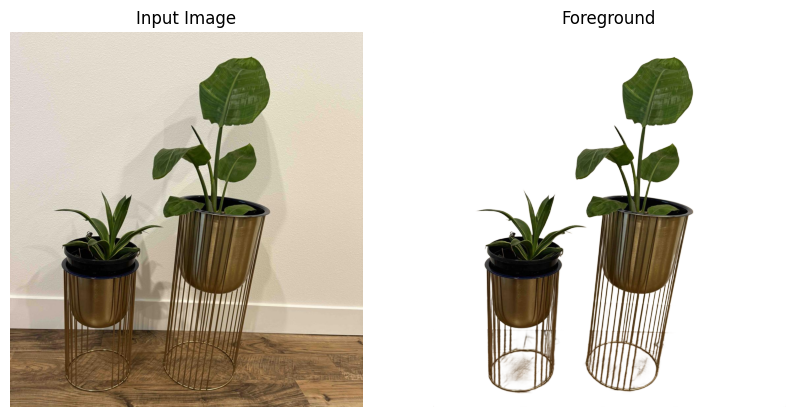

In [2]:
image = Image.open("../samples/plants.jpg").convert("RGB")
print(image.size)

 # Refine foreground is an extract postprocessing step that 
 # increases inference time but can improve matting edges. 
foreground = model.inference(image.copy(), refine_foreground=False)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Input Image")
axes[0].axis('off')
axes[1].imshow(foreground)
axes[1].set_title("Foreground")
axes[1].axis('off')
plt.show()
